### Importação dos dados



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [43]:
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loaja4']
faturamento = []
faturamento.append(round(float(loja['Preço'].sum()), 2))
faturamento.append(round(float(loja2['Preço'].sum()), 2))
faturamento.append(round(float(loja3['Preço'].sum()), 2))
faturamento.append(round(float(loja4['Preço'].sum()), 2))
faturamento_lojas = tuple(zip(lojas, faturamento))
print(f'Faturamento das lojas: {faturamento_lojas}')


Faturamento das lojas: (('Loja1', 1534509.12), ('Loja2', 1488459.06), ('Loja3', 1464025.03), ('Loaja4', 1384497.58))


Gráfico de barras do faturamento das quatro lojas

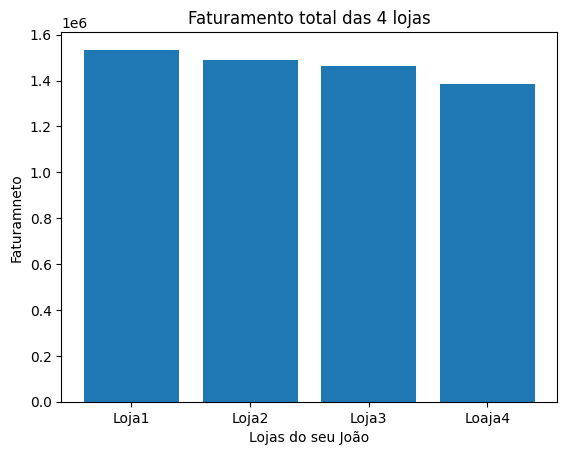

In [13]:
plt.bar(lojas, faturamento)
plt.ylabel('Faturamneto')
plt.xlabel('Lojas do seu João')
plt.title('Faturamento total das 4 lojas')
plt.show()

# 2. Vendas por Categoria


In [20]:
#a classe Counter da biblioteca colletions, vai contar quantas vezes cada elemento aparece em uma lista, tupla, etc
categorias_loja1 = Counter(loja['Categoria do Produto']).most_common()
categorias_loja2 = Counter(loja2['Categoria do Produto']).most_common()
categorias_loja3 = Counter(loja3['Categoria do Produto']).most_common()
categorias_loja4 = Counter(loja4['Categoria do Produto']).most_common()
print(f'A categoiria mais vendida da loja 1 são os {categorias_loja1[0]} e a menos vendida são os {categorias_loja1[-1]}, com {len(categorias_loja1)} categorias')
print(f'A categoiria mais vendida da loja 2 são os {categorias_loja2[0]} e a menos vendida são os {categorias_loja2[-1]}, com {len(categorias_loja2)} categorias')
print(f'A categoiria mais vendida da loja 3 são os {categorias_loja3[0]} e a menos vendida são os {categorias_loja3[-1]}, com {len(categorias_loja3)} categorias')
print(f'A categoiria mais vendida da loja 4 são os {categorias_loja4[0]} e a menos vendida são os {categorias_loja4[-1]}, com {len(categorias_loja4)} categorias')

A categoiria mais vendida da loja 1 são os ('moveis', 465) e a menos vendida são os ('utilidades domesticas', 171), com 8 categorias
A categoiria mais vendida da loja 2 são os ('moveis', 442) e a menos vendida são os ('utilidades domesticas', 181), com 8 categorias
A categoiria mais vendida da loja 3 são os ('moveis', 499) e a menos vendida são os ('utilidades domesticas', 177), com 8 categorias
A categoiria mais vendida da loja 4 são os ('moveis', 480) e a menos vendida são os ('instrumentos musicais', 170), com 8 categorias


# 3. Média de Avaliação das Lojas

In [4]:
media_avaliacao_loja1 = round(loja['Avaliação da compra'].sum()/len(loja['Avaliação da compra']), 2)
media_avaliacao_loja2 = round(loja2['Avaliação da compra'].sum()/len(loja2['Avaliação da compra']), 2)
media_avaliacao_loja3 = round(loja3['Avaliação da compra'].sum()/len(loja3['Avaliação da compra']), 2)
media_avaliacao_loja4 = round(loja4['Avaliação da compra'].sum()/len(loja4['Avaliação da compra']), 2)

Ordenar da loja mais bem avalida para a menos avaliada.

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


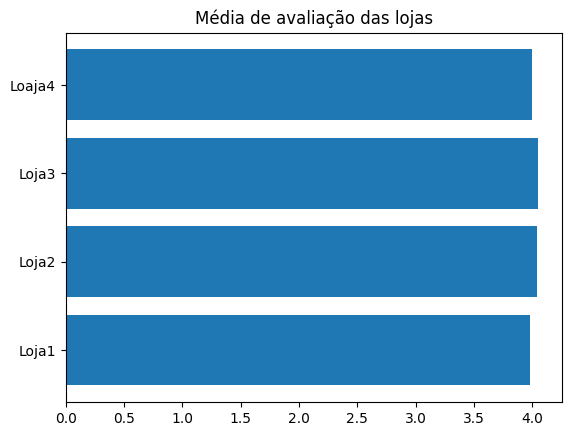

In [47]:
media_avaliacao = []
media_avaliacao.append(media_avaliacao_loja1)
media_avaliacao.append(media_avaliacao_loja2)
media_avaliacao.append(media_avaliacao_loja3)
media_avaliacao.append(media_avaliacao_loja4)
print(media_avaliacao)

plt.barh(lojas, media_avaliacao)
plt.title('Média de avaliação das lojas')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [29]:
produtos_loja1 = Counter(loja['Produto']).most_common()
produtos_loja2 = Counter(loja2['Produto']).most_common()
produtos_loja3 = Counter(loja3['Produto']).most_common()
produtos_loja4 = Counter(loja4['Produto']).most_common()
print(f'Os produtos mais vendidos da Loja1 é o {produtos_loja1[0]},  {produtos_loja1[1]},  {produtos_loja1[2]} e o menos vendido é o {produtos_loja1[-1]}, , com uma variedade de {len(produtos_loja1)} produtos')
print(f'O produto mais vendido da Loja2 é o {produtos_loja2[0]} e o menos vendido é o {produtos_loja2[-1]}, com uma variedade de {len(produtos_loja2)} produtos')
print(f'O produto mais vendido da Loja3 é o {produtos_loja3[0]} e o menos vendido é o {produtos_loja3[-1]}, com uma variedade de {len(produtos_loja3)} produtos')
print(f'O produto mais vendido da Loja4 é o {produtos_loja4[0]} e o menos vendido é o {produtos_loja4[-1]}, com uma variedade de {len(produtos_loja4)} produtos')

Os produtos mais vendidos da Loja1 é o ('Micro-ondas', 60),  ('TV Led UHD 4K', 60),  ('Guarda roupas', 60) e o menos vendido é o ('Celular ABXY', 33), , com uma variedade de 51 produtos
O produto mais vendido da Loja2 é o ('Iniciando em programação', 65) e o menos vendido é o ('Jogo de tabuleiro', 32), com uma variedade de 51 produtos
O produto mais vendido da Loja3 é o ('Kit banquetas', 57) e o menos vendido é o ('Blocos de montar', 35), com uma variedade de 51 produtos
O produto mais vendido da Loja4 é o ('Cama box', 62) e o menos vendido é o ('Guitarra', 33), com uma variedade de 51 produtos


# 5. Frete Médio por Loja


In [46]:
frete_medio_loja1 = round(loja['Frete'].mean(), 2)
frete_medio_loja2 = round(loja2['Frete'].mean(), 2)
frete_medio_loja3 = round(loja3['Frete'].mean(), 2)
frete_medio_loja4 = round(loja4['Frete'].mean(), 2)
print(f'O frete médio da loja 1 é de {frete_medio_loja1} reais')
print(f'O frete médio da loja 2 é de {frete_medio_loja2} reais')
print(f'O frete médio da loja 3 é de {frete_medio_loja3} reais')
print(f'O frete médio da loja 4 é de {frete_medio_loja4} reais')
frete_lojas = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

O frete médio da loja 1 é de 34.69 reais
O frete médio da loja 2 é de 33.62 reais
O frete médio da loja 3 é de 33.07 reais
O frete médio da loja 4 é de 31.28 reais


Text(0.5, 1.0, 'Percentual do frete médio pago por cada loja em relação ao frete médio total')

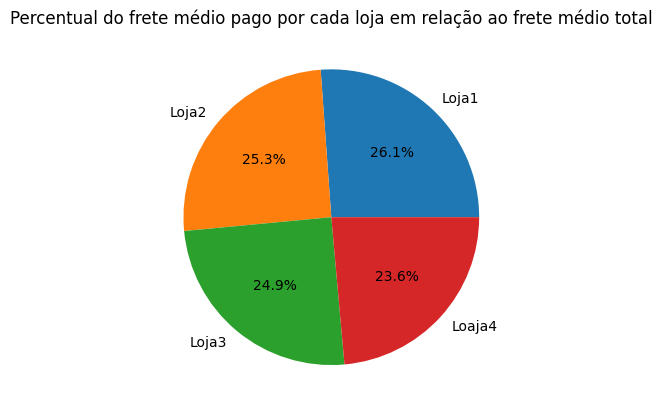

In [42]:
plt.pie(frete_lojas, labels = lojas, autopct='%1.1f%%')
plt.title('Percentual do frete médio pago por cada loja em relação ao frete médio total')

#6. Analise descritiva dos dados obtidos

Com base nos dados fornecidos foram desenvolvido 5 métricas, com o ojetivo de escoher uma loja que o sr João possa vender. Além das métircas foram criados 3 graficos, g´rafico de barras com o faturamento médio de cada loja (Faturamento total das 4 lojas), gráfico de colunas com a média de avaliação dos produtos de cada loja (Média de avaliação das lojas) e um gráfco de setores abordando o frete médio por venda feita de cada loja em comparação ao frete médio total paga por todas as lojas juntas ('Percentual do frete médio pago por cada loja em relação ao frete médio total').
No gráfico 'Faturamento total das 4 lojas' percebe-se que as quatro lojas possuem um faturamento muito próximo, onde a loja1 possue o maior faturamento, com um valor de 1534509.12 reais,  e a loja4  possui o menor, com 1384497.58 reais.  
Ao analisar a categoria mais vendida em cada loja, percebeu-se que os "Móveis" são mais vendidos em todas as lojas. Já os "Utilidades domésticas" é o menos vendido, com exceção da loja 4 que é o "Instrumentos musicais". Ale´m disso, todas as lojas possuem a mesma quantidade de categorias disponiveis para a venda.
Após verificar as médias de avalições conclui-se que todas as lojas possuem uma avaliação boa, pois são entorno do valor 4. Com bse no gráfico  "Média de avaliação das lojas" percebe-se que as lojas não possuem uma difrença muito grande em relação a média de avalição, mas se destacam a loja 1 com uma avaliação de 3.98, sendo a menor média, e a loja 4 com a melhor avaliação com 4.05.
Verificando os produtos vendidos em cada loja tem-se:
- Loja 1 com  os mais vendidos: Micro-ondas, TV Led UHD 4K, Guarda-roupas (todos com 60 unidades). O menos vendido Celular ABXY com 33 unidades.
- Loja 2 com o mais vendido sendo  Iniciando em Programação com 65 unidades e o menos vendido Jogo de tabuleiro.
- Loja 3 com o mais vendido sendo Kit Banquetas  com 57 unidades e o menos vendido o Blocos de Montar com 35 unidades.
- Loja 4 com o mais vendidosendo Cama Box com 62 unidades e o menos vendido Guitarra com 33 unidades.

Analise o frete médio das lojas percebe-se que ambas possuem um gasto muito próximo, o que é comprovado pelo gráfico de setores (Percentual do frete médio pago por cada loja em relação ao frete médio total) mas que acaba destacando a loja 1 como aque mais gasta em média com frete e a loja 4 como a que menos gasta.